# Homework 3

Name:Kavana Manvi Krishnamurthy

Student ID: 2158984

## 1.	Regression Analysis 

For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". Note: The two identifier attributes "state" and "community name" should be excluded for the regression task.
Your tasks in this problem are the following.


#### a. Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment, you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [5]:
import numpy as np
import pandas as pd
import pylab as pl

In [6]:
df = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW3/communities/communities.csv")
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [7]:
#remove state and communityname column
df = df.drop('state', axis=1)
df = df.drop('communityname', axis=1)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [8]:
#handle missing values by imputing with mean
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (ignoring errors due to non-numeric data)
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values with column mean
df.fillna(df.mean(), inplace=True)

In [9]:
#basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.63,0.85,0.94,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.04,0.07,0.17,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.651530,0.198221,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [10]:
#seperate target feature
X = df.drop('ViolentCrimesPerPop', axis=1)  
y = df['ViolentCrimesPerPop']      

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

####  b. Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [13]:
from sklearn.linear_model import LinearRegression
# Create linear regression object 
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,y_train)

LinearRegression()

In [14]:
# Let's put some names to the faces
for i in range(len(X.columns)):
    print("%7s   %2.7f" % (X.columns[i], linreg.coef_[i]))

population   -0.0075266
householdsize   -0.0528397
racepctblack   0.2215476
racePctWhite   -0.0503199
racePctAsian   -0.0196010
racePctHisp   0.0476950
agePct12t21   0.1022852
agePct12t29   -0.1698965
agePct16t24   -0.1262115
agePct65up   0.0714205
numbUrban   -0.1258533
pctUrban   0.0387986
medIncome   -0.2019181
pctWWage   -0.2131219
pctWFarmSelf   0.0421247
pctWInvInc   -0.0744446
pctWSocSec   0.0124852
pctWPubAsst   0.0225201
pctWRetire   -0.0958013
medFamInc   0.3539796
perCapInc   0.0757327
whitePerCap   -0.3520899
blackPerCap   -0.0293676
indianPerCap   -0.0415894
AsianPerCap   0.0333221
OtherPerCap   0.0471029
HispPerCap   0.0389022
NumUnderPov   0.2977708
PctPopUnderPov   -0.2385513
PctLess9thGrade   -0.0085328
PctNotHSGrad   -0.0453960
PctBSorMore   0.0767420
PctUnemployed   0.0156572
PctEmploy   0.2250517
PctEmplManu   -0.0497874
PctEmplProfServ   -0.0391367
MalePctDivorce   0.3461948
MalePctNevMarr   0.2117273
FemalePctDiv   0.0754492
TotalPctDiv   -0.3591211
PersPerFam   -

In [15]:
# The following function can be used to plot the model coefficients for better visualization
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.figure(figsize=(10, n_features // 2)) 
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

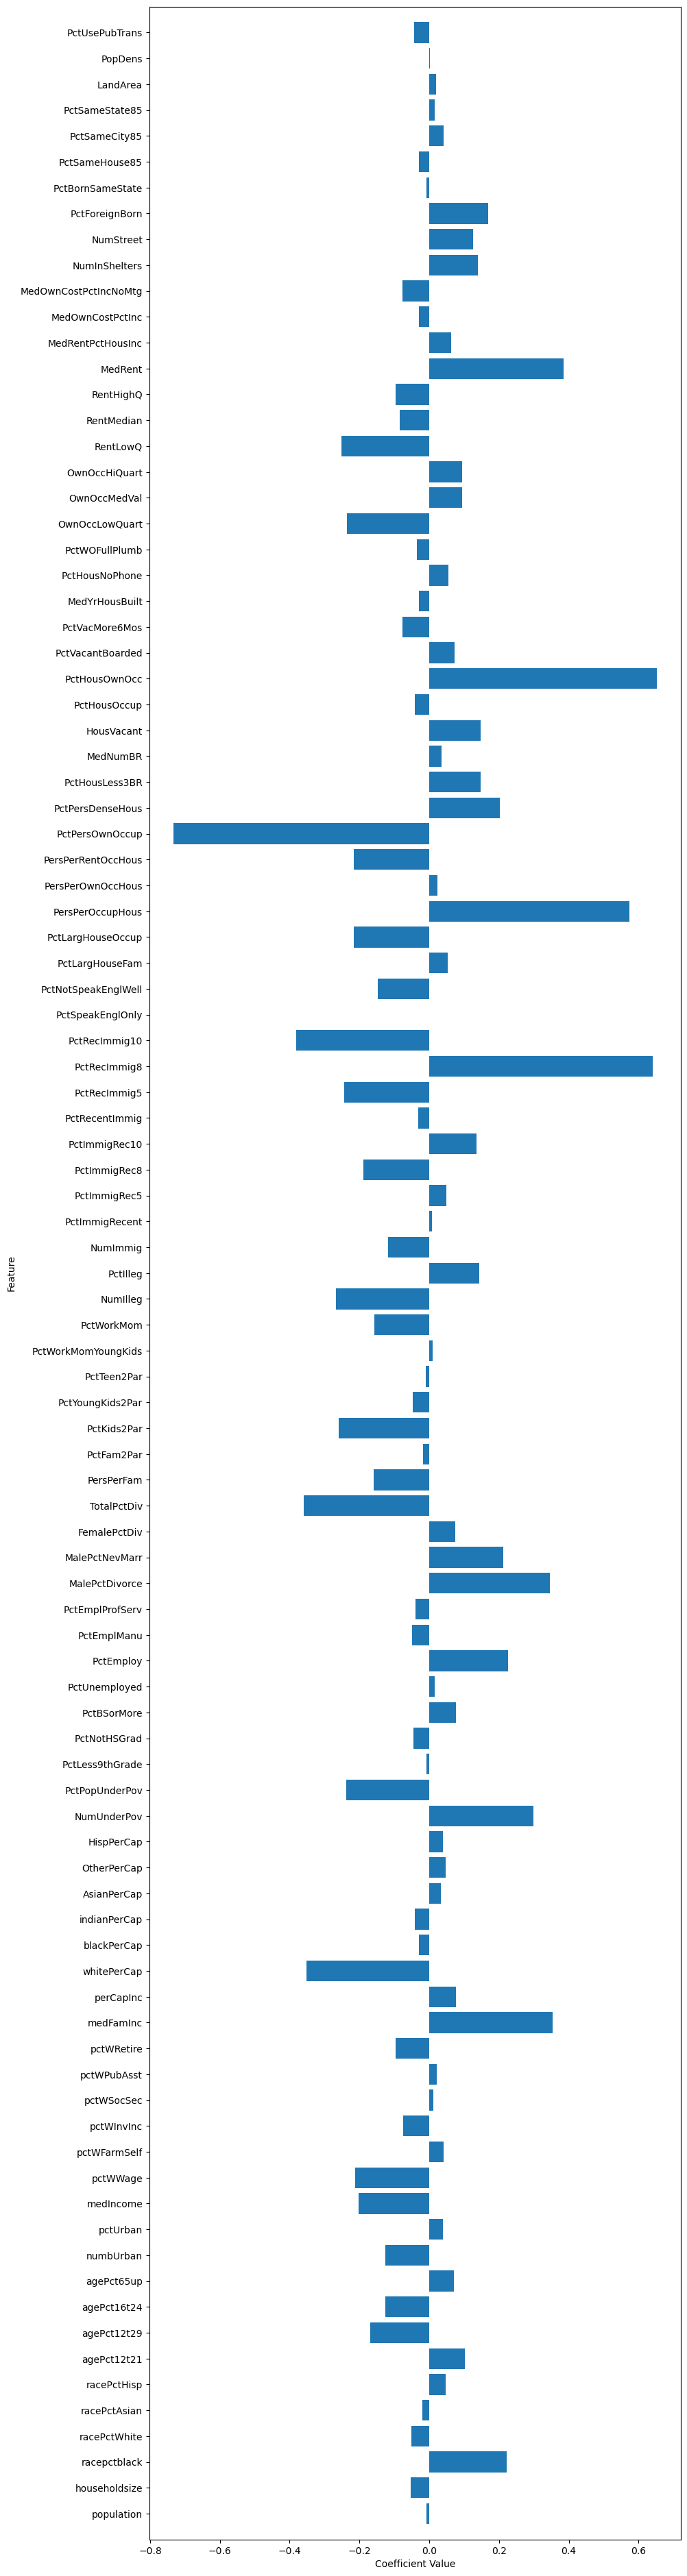

In [16]:
plot_coefficients(linreg, len(X.columns), X.columns)

In [17]:
# We can also directly obtain the regression intercept value:

print("Linear Regression Intercept: ", linreg.intercept_)

Linear Regression Intercept:  0.519188914080604


In [18]:
# First, let's compute errors on all training instances

p_train = linreg.predict(X_train) # p_train is the array of predicted values

# Now we can constuct an array of errors
err_train = abs(p_train - y_train)

# Let's see the error values on the first 10 predictions
print(err_train[:10])

1184    0.110619
401     0.226793
1864    0.093679
1390    0.064624
1066    0.000822
758     0.111372
586     0.143071
573     0.025812
56      0.009983
427     0.271311
Name: ViolentCrimesPerPop, dtype: float64


In [19]:
# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_train,err_train)

# Finally compute RMSE
rmse_train = np.sqrt(sum_sq_err/len(p_train))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12619593133426688


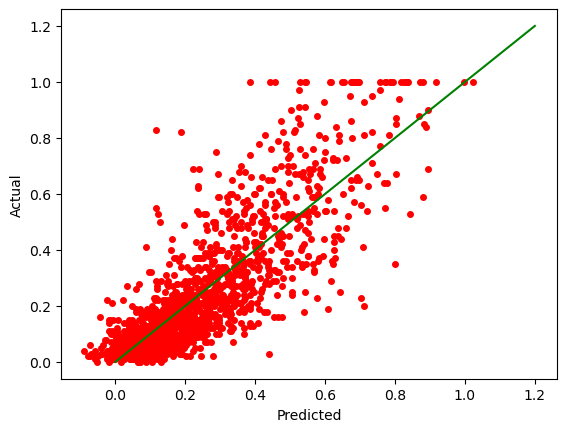

In [20]:
# Plot predicted against actual (in the training data)
%matplotlib inline
pl.plot(p_train, y_train,'ro', markersize=4)
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [21]:
# Similarly we can compute RMSE on the test data

p_test = linreg.predict(X_test) # array of predicted values

# Now we can constuct an array of errors
err_test = abs(p_test - y_test)

# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_test,err_test)

# Finally compute RMSE
rmse_test = np.sqrt(sum_sq_err/len(p_test))
print("RMSE on Test Data: ", rmse_test)

RMSE on Test Data:  0.14346539194019747


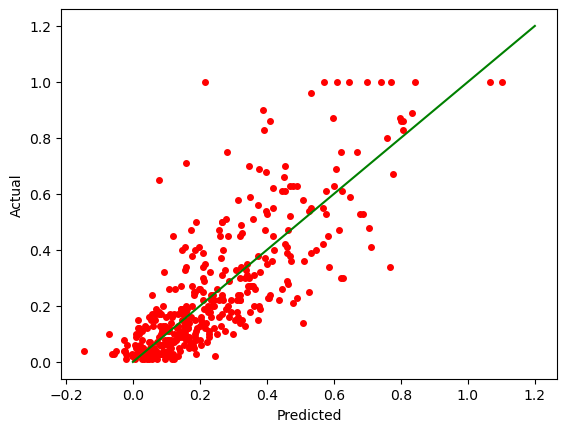

In [22]:
# Plot predicted against actual (in the test data)
%matplotlib inline
pl.plot(p_test, y_test,'ro', markersize=4)
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print("RMSE on Test Data: ", rmse_test)

mae_test = mean_absolute_error(p_test, y_test)
print("MAE on Test Data: ", mae_test)

RMSE on Test Data:  0.14346539194019747
MAE on Test Data:  0.10099804464731499


In [24]:
def cross_validate(model, X, y, n, verbose=True):
    # model: regression model to be trained
    # X: the training data matrix
    # y: the training target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.metrics import mean_squared_error
    
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=n, random_state=22,shuffle=True) # specifying random_state ensures the same random
                                            # partitions are used across different runs
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train]) # fit model to the training partition in this fold
        p_test = model.predict(X[test]) # apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [25]:
# Computing the mean RMSE on 10-fold cross-validation

rmse_10cv = cross_validate(linreg, np.array(X_train), np.array(y_train), 10, verbose=True)

rmse_10cv

Fold  1 RMSE: 0.1300
Fold  2 RMSE: 0.1123
Fold  3 RMSE: 0.1299
Fold  4 RMSE: 0.1287
Fold  5 RMSE: 0.1332
Fold  6 RMSE: 0.1220
Fold  7 RMSE: 0.1681
Fold  8 RMSE: 0.1388
Fold  9 RMSE: 0.1326
Fold 10 RMSE: 0.1517


0.1347421661396177

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(linreg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_scores)))

[0.14373935 0.13848502 0.13298995 0.1360245  0.1351074  0.13231055
 0.11917148 0.12158482 0.13669634 0.14684537]


#### Now we can compare RMSE values for the training data and for cross-validation

In [29]:
# Computing the RMSE on the full training data

p_train = linreg.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1270
RMSE on 10-fold CV: 0.1347


#### c. Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use absolute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.

## Feature selection

In [33]:
from sklearn import feature_selection

In [34]:
def optimal_feature_selection(X, y, model, k=5):
    percentiles = range(1, 100)
    results = []
    for i in range(1, 100):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X_train, y_train)
        scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
        #print("%2d  %0.4f" % (i, scores.mean()))
        results = np.append(results, scores.mean())
    return results

In [35]:
results = optimal_feature_selection(X_train, y_train, linreg)

In [36]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

40


Optimal percentile of features:41 

Optimal number of features:39 



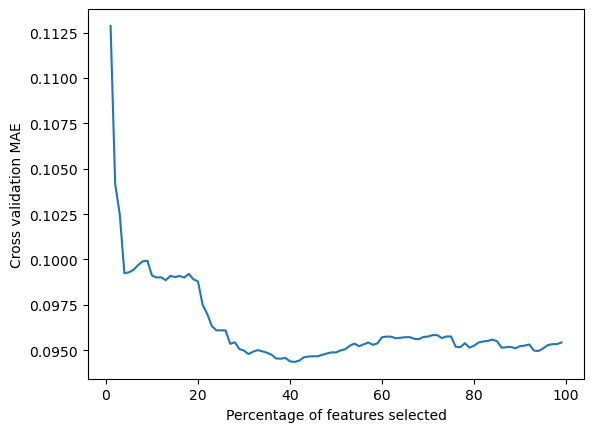

In [37]:
percentiles = range(1, 100)
X = pd.DataFrame(X_train)
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation MAE")
#pl.plot(percentiles,results)
pl.plot(percentiles,np.abs(results))

In [38]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_num_features)

# Fit and check the number of selected features
fs.fit(X_train, y_train)
print(f"Number of selected features: {fs.transform(X_train).shape[1]}")

Number of selected features: 38


### Evaluate our best number of features on the test set

In [40]:
from sklearn import metrics

In [41]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression , percentile= optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
linreg.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)

In [42]:
# Create and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_fs, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test_fs)

In [43]:
print("Mean Absolute Error: {:.3f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error: {:.3f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared: {:.3f}".format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.103
Mean Squared Error: 0.022
R-squared: 0.622


#### d. Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. 

#### Regression with Ridge regularization:

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error  # For RMSE calculation
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation

In [47]:
def ridge_reg_tune_alpha(X_train, y_train, model, alpha_values, k):
    rmse_train = []
    rmse_cv = []

    for a in alpha_values:
        model.alpha = a  # Set alpha to 'a' from alpha_values
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        cv_score = -cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

        rmse_cv.append(np.sqrt(cv_score.mean()))

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
    return rmse_train, rmse_cv

In [48]:
alpha_values = np.logspace(-6, 6, 13)
ridge = Ridge()
ridge_rmse_train, ridge_cv_rmse = ridge_reg_tune_alpha(X_train, y_train, ridge, alpha_values, k=5)

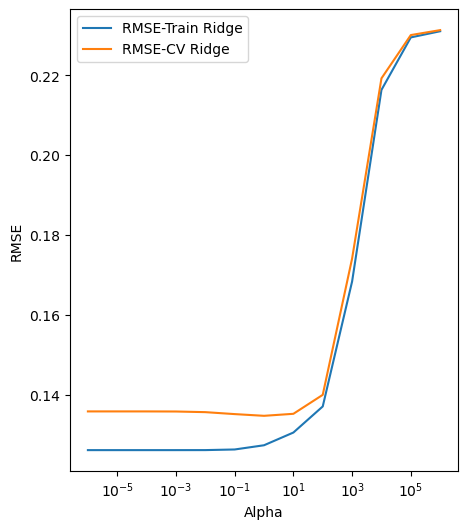

In [49]:
alpha = np.logspace(-6, 6, 13)
fig = pl.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.plot(alpha, ridge_rmse_train, label='RMSE-Train Ridge')
ax.plot(alpha, ridge_cv_rmse, label='RMSE-CV Ridge')
pl.legend()
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.xscale("log")
pl.show()

In [50]:
from sklearn.linear_model import Lasso

In [51]:
alpha_values = np.logspace(-6, 6, 13)
lasso=Lasso(max_iter=10700)
lasso_rmse_train, lasso_cv_rmse = ridge_reg_tune_alpha(X_train, y_train, lasso, alpha_values, k=5)

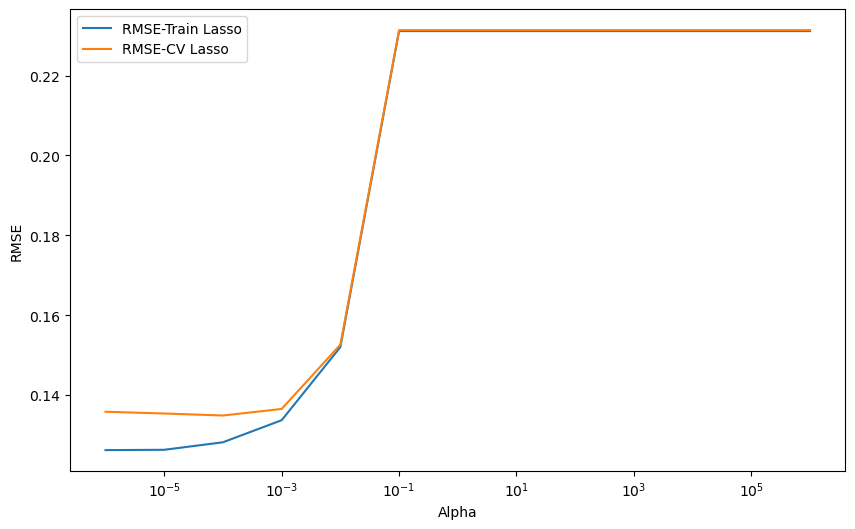

In [52]:
alpha = np.logspace(-6, 6, 13)
fig = pl.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(alpha, lasso_rmse_train, label='RMSE-Train Lasso')
ax.plot(alpha, lasso_cv_rmse, label='RMSE-CV Lasso')
pl.legend()
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.xscale("log")
pl.show()

Ridge regression is a method used to mitigate overfitting in linear models by introducing a regularization term to the cost function. This term penalizes large coefficients, shrinking them towards zero, which helps reduce the model's complexity and enhances its ability to generalize to new data.

The regularization strength is controlled by the parameter alpha. Lower alpha values apply minimal regularization, allowing the model to fit the training data closely but increasing the risk of overfitting. On the other hand, higher alpha values impose stronger regularization, simplifying the model but potentially causing underfitting. The key is to find the optimal alpha value that balances bias and variance, ensuring the model performs well on both training and unseen data.

In [255]:
# Create linear regression object with a ridge coefficient 0.001
ridge = Ridge(alpha=1000)

# Train the model using the training set
ridge.fit(X_train, y_train)

p_train = ridge.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = ridge.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Ridge Regression
RMSE on training: 0.8885
RMSE on test data: 0.9868


#### Let's repeat this process with Lasso regression.

In [265]:
# Let's pick 0.001 for lasso regularization coefficient
lasso = Lasso(alpha=1000)

# Train the model using the training set
lasso.fit(X_train, y_train)

p_train = lasso.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = lasso.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Lasso Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Lasso Regression
RMSE on training: 1.4168
RMSE on test data: 1.4038


The provided image illustrates the impact of the alpha parameter on the bias-variance trade-off in ridge regression. The RMSE for the training set remains relatively low and stable as alpha increases, indicating that the model consistently fits the training data well. However, the RMSE for the cross-validation set shows a U-shaped curve, reflecting the typical bias-variance trade-off. As alpha increases, the model becomes more regularized, reducing variance but potentially increasing bias. The optimal alpha value lies at the point where the cross-validation error is minimized, striking a balance between underfitting and overfitting.

Lasso regression, similar to ridge regression, also utilizes an alpha parameter for regularization. However, Lasso regression has the additional ability to perform feature selection by setting certain coefficients to exactly zero. This can lead to improved model interpretability and potentially better generalization performance. Like ridge regression, Lasso regression also faces the bias-variance trade-off. A small alpha value can lead to overfitting, while a large alpha value can result in underfitting. The optimal alpha value lies in balancing these two extremes.

#### e. Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fitting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training performance. Provide a brief summary of your findings from the above experiments

In [58]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [59]:
# Define the pipeline for the SGDRegressor
sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_model', SGDRegressor(random_state=33, max_iter=1000, tol=1e-3))
])

In [60]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'sgd_model__alpha': np.logspace(-4, 1, 6),
    'sgd_model__penalty': ['l2', 'l1']
}

In [61]:
# Perform grid search for SGDRegressor
grid_search = GridSearchCV(sgd_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_sgd_model = grid_search.best_estimator_

In [62]:
# Calculate RMSE for the best SGD model
train_rmse_sgd = np.sqrt(mean_squared_error(y_train, best_sgd_model.predict(X_train)))
test_rmse_sgd = np.sqrt(mean_squared_error(y_test, best_sgd_model.predict(X_test)))
print(f"Train RMSE (SGD): {train_rmse_sgd:.4f}, Test RMSE (SGD): {test_rmse_sgd:.4f}")


Train RMSE (SGD): 0.1320, Test RMSE (SGD): 0.1468


In [63]:
# Define the parameter grid for Elastic Net using the best alpha from previous search
elastic_grid = {
    'sgd_model__alpha': [grid_search.best_params_['sgd_model__alpha']],
    'sgd_model__penalty': ['elasticnet'],
    'sgd_model__l1_ratio': np.linspace(0, 1, 11)
}


In [64]:
# Perform grid search for Elastic Net
grid_search_elastic = GridSearchCV(sgd_pipeline, elastic_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train, y_train)
best_elastic_model = grid_search_elastic.best_estimator_

In [65]:
# Calculate RMSE for the best Elastic Net model
y_train_elastic_pred = best_elastic_model.predict(X_train)
train_rmse_elastic = np.sqrt(mean_squared_error(y_train, y_train_elastic_pred))

In [66]:
y_test_elastic_pred = best_elastic_model.predict(X_test)
test_rmse_elastic = np.sqrt(mean_squared_error(y_test, y_test_elastic_pred))

In [67]:

# Display the results
(train_rmse_elastic, test_rmse_elastic)


(0.13199069423798254, 0.1468338635144639)

# Question 2
## 	Automatic Document Clustering 

###  For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.Your tasks in this problem are the following :


### a.	[5 pts] Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimensional vectors and returns the inverse as the distance between these vectors.

In [71]:

def distCosine(vecA, vecB):
    # find the vector norm vecA 
    A_norm = np.linalg.norm(vecA)
    # find the vector norm vecB
    B_norm = np.linalg.norm(vecB)
    # Compute Cosine
    ## Divide the dot product of vecA and vecB by the product of the two norms
    
    denom = A_norm * B_norm
    if denom == 0:  # Handle division by zero
        return float('inf')
    sims = np.dot(vecA,vecB)/(A_norm * B_norm)
    # distance measure is represented by the inverse of Cosine similarity
    dists = 1 - sims
    return dists #returns cosine similarity


### b.	[10 pts] Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [73]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 

In [74]:
df_matrix = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW3/newsgroups5/matrix.txt",sep=',', header=None)
df_matrix.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#transpose it
df_matrix = df_matrix.T

In [76]:
df_matrix.shape

(2500, 9328)

In [77]:
# Use a raw string or double the backslash to avoid escape sequence issues.
df_classes = pd.read_csv(
    r'/Users/kavanamanvi/Desktop/PML/HW3/newsgroups5/classes.txt', 
    sep=r'\s+',  # Use raw regex for whitespace separator
    header=None, 
    index_col=0, 
    skiprows=1, 
    engine='python'  # Force the use of the 'python' engine
)
df_classes.head(3)

,1
0,
0,0
1,1
2,1


In [78]:
df_classes.shape

(2500, 1)

In [79]:
terms = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW3/newsgroups5/terms.txt",sep=',', header=None)
terms.head(5)

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


## Train  Test split

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_matrix,  
    df_classes.values.ravel(),         
    test_size=0.2,    
    random_state=99   # For reproducibility
)

In [82]:
X_train.shape

(2000, 9328)

In [83]:
X_test.shape

(500, 9328)

## TFIDF Scikit

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer

In [86]:
# Initialize the TFxIDF transformer
tfidf_transformer = TfidfTransformer()

# Fit the transformer to the training data and transform both the train and test sets
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

#Since you will end up with a sparse matrix, do the following to get your KMeans function to work:

# Converting TFIDF data to Dense Format

X_train_dense = X_train_tfidf.toarray()

### c.	[20 pts] Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the number of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

### Important Note: for this problem you should try several values of k for the number of clusters (try values of k from 4 through 8) and in each case try several runs in order to obtain clusters that seem more meaningful. In some cases, you may find some small clusters containing noise documents, which is not unusual. The point is to experiment with different runs and cluster numbers until you find at least several clusters that seem to capture some of the key topics in the documents. You do not need to provide the results of all your runs; you should only provide the results of your best clustering along with a brief discussion of your experimentation and your final observations.

In [88]:
from numpy import *
import numpy as np

In [89]:
def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

In [90]:
def kMeans(dataSet, k, distMeas, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [91]:
#centroids_tfidf, clusters_tfidf = kMeans(DT_tfidf, 6, distCosine, randCent)
centroids_tfidf, clusters_tfidf = kMeans(X_train_dense, 6, distCosine, randCent)

### Top 10 terms

In [93]:
import numpy as np
import pandas as pd

def displayClusterTopTerms(centroids, clusterAssment, terms, dataSet, topN=10):
    # Get the unique clusters
    unique_clusters = np.unique(clusterAssment[:, 0])
    
    # Iterate over each cluster
    for cluster in unique_clusters:
        # Get points in the cluster
        cluster_points = np.nonzero(clusterAssment[:, 0] == cluster)[0]
        cluster_size = len(cluster_points)
        
        # Display header information
        print(f"Cluster {int(cluster)} size = {cluster_size}")
        print("------------------------------------------------")
        print(f"\tTerm\tFreq\tDF\t% of Docs")
        
        # Extract centroid values for the current cluster
        centroid_weights = centroids[int(cluster), :]
        
        # Sort terms by their frequency (centroid weights) in descending order
        sorted_indices = np.argsort(centroid_weights)[::-1][:topN]
        
        # Calculate DF values for each term
        for idx in sorted_indices:
            term = terms[idx]
            freq = centroid_weights[idx]*100
            
            # Count the documents containing the term (TF-IDF > 0 in the document for that term)
            term_in_docs = np.sum(dataSet[cluster_points, idx] > 0)
            df = term_in_docs / cluster_size
            percent_docs = df * 100
            
            print(f"\t{term}\t{freq:.2f}\t{term_in_docs}\t{percent_docs:.2f}")
        print("\n")


In [94]:
terms_list = terms.iloc[:, 0].tolist()

In [95]:
# Call the function with the necessary arguments
topN = 10  # Display top 10 terms per cluster
displayClusterTopTerms(centroids_tfidf, clusters_tfidf, terms_list, X_train_dense, topN)

Cluster 0 size = 374
------------------------------------------------
	Term	Freq	DF	% of Docs
	god	7.75	220	58.82
	christian	5.82	178	47.59
	sin	3.55	84	22.46
	jesu	3.38	111	29.68
	church	3.20	94	25.13
	peopl	2.92	172	45.99
	believ	2.82	154	41.18
	bibl	2.73	108	28.88
	on	2.71	206	55.08
	christ	2.53	112	29.95


Cluster 1 size = 251
------------------------------------------------
	Term	Freq	DF	% of Docs
	email	2.77	87	34.66
	subject	2.67	251	100.00
	on	2.24	91	36.25
	pleas	2.22	62	24.70
	want	1.99	63	25.10
	address	1.97	44	17.53
	phone	1.90	48	19.12
	mail	1.82	36	14.34
	price	1.77	36	14.34
	get	1.66	66	26.29


Cluster 2 size = 284
------------------------------------------------
	Term	Freq	DF	% of Docs
	sale	8.81	199	70.07
	offer	4.24	101	35.56
	drive	4.06	54	19.01
	ship	3.19	75	26.41
	email	2.85	98	34.51
	subject	2.82	284	100.00
	card	2.61	51	17.96
	pleas	2.57	97	34.15
	cd	2.43	30	10.56
	sell	2.40	60	21.13


Cluster 3 size = 336
------------------------------------------------
	Term	Fr

In [96]:
clusters= clusters_tfidf

### [Extra Credit - 5 pts: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster (using your best clustering from earlier experiments.]


In [98]:
from wordcloud import WordCloud

In [236]:
input_data = X_train_dense

# Creating separate DataFrames for each cluster
cluster_0_df = pd.DataFrame(input_data[clusters[:, 0] == 0])
cluster_1_df = pd.DataFrame(input_data[clusters[:, 0] == 1])
cluster_2_df = pd.DataFrame(input_data[clusters[:, 0] == 2])
cluster_3_df = pd.DataFrame(input_data[clusters[:, 0] == 3])
cluster_4_df = pd.DataFrame(input_data[clusters[:, 0] == 4])
cluster_5_df = pd.DataFrame(input_data[clusters[:, 0] == 5])

In [238]:
terms_array = np.array(terms)
cluster_0_df.columns = terms_array.T[0]
cluster_1_df.columns = terms_array.T[0]
cluster_2_df.columns = terms_array.T[0]
cluster_3_df.columns = terms_array.T[0]
cluster_4_df.columns = terms_array.T[0]
cluster_5_df.columns = terms_array.T[0]

In [240]:
# Get frequencies for each cluster
freq_cluster_0 = list(np.array((cluster_0_df.T != 0).sum(1).T))
freq_cluster_1 = list(np.array((cluster_1_df.T != 0).sum(1).T))
freq_cluster_2 = list(np.array((cluster_2_df.T != 0).sum(1).T))
freq_cluster_3 = list(np.array((cluster_3_df.T != 0).sum(1).T))
freq_cluster_4 = list(np.array((cluster_4_df.T != 0).sum(1).T))
freq_cluster_5 = list(np.array((cluster_5_df.T != 0).sum(1).T))

In [242]:
# Creating a list of terms for wordcloud generation
terms_list = list(terms_array.T[0])

# Initializing strings to hold the words for each cluster
words_cluster_0 = ""
words_cluster_1 = ""
words_cluster_2 = ""
words_cluster_3 = ""
words_cluster_4 = ""
words_cluster_5 = ""

In [244]:
# Creating the strings based on frequency counts for each cluster
for index, freq in enumerate(freq_cluster_0):
    words_cluster_0 += (terms_list[index] + " ") * int(freq)

for index, freq in enumerate(freq_cluster_1):
    words_cluster_1 += (terms_list[index] + " ") * int(freq)

for index, freq in enumerate(freq_cluster_2):
    words_cluster_2 += (terms_list[index] + " ") * int(freq)

for index, freq in enumerate(freq_cluster_3):
    words_cluster_3 += (terms_list[index] + " ") * int(freq)

for index, freq in enumerate(freq_cluster_4):
    words_cluster_4 += (terms_list[index] + " ") * int(freq)

for index, freq in enumerate(freq_cluster_5):
    words_cluster_5 += (terms_list[index] + " ") * int(freq)

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

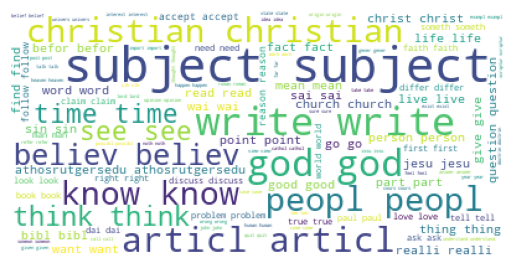

In [224]:
wordcloud_cluster_0 = WordCloud(background_color='white').generate(words_cluster_0)
plt.imshow(wordcloud_cluster_0)
plt.axis('off')  # Hide the axes
plt.show()

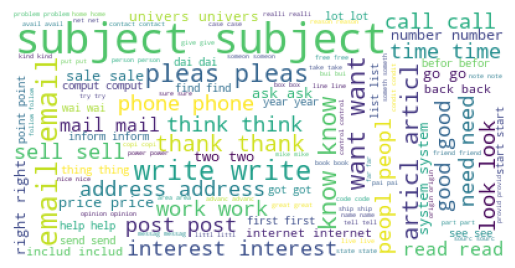

In [226]:
# Cluster 1
wordcloud_cluster_1 = WordCloud(background_color='white').generate(words_cluster_1)
plt.imshow(wordcloud_cluster_1)
plt.axis('off')  # Hide the axes
plt.show()

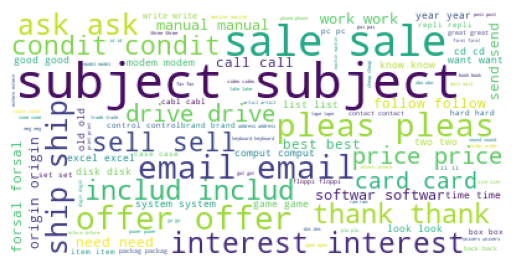

In [228]:
# Cluster 2
wordcloud_cluster_2 = WordCloud(background_color='white').generate(words_cluster_2)
plt.imshow(wordcloud_cluster_2)
plt.axis('off')  # Hide the axes
plt.show()

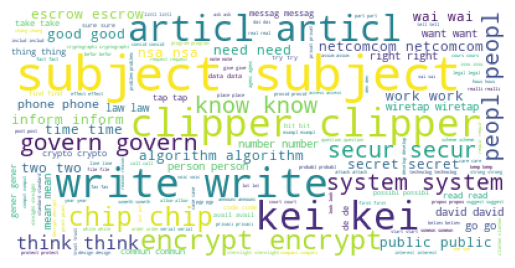

In [230]:
# Cluster 3
wordcloud_cluster_3 = WordCloud(background_color='white').generate(words_cluster_3)
plt.imshow(wordcloud_cluster_3)
plt.axis('off')  # Hide the axes
plt.show()

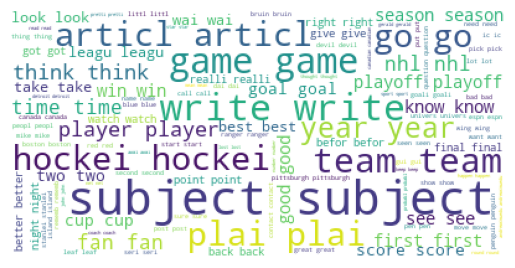

In [232]:
# Cluster 4
wordcloud_cluster_4 = WordCloud(background_color='white').generate(words_cluster_4)
plt.imshow(wordcloud_cluster_4)
plt.axis('off')  # Hide the axes
plt.show()

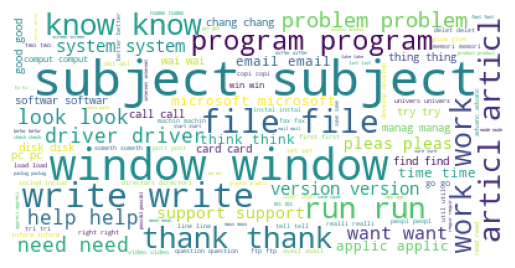

In [246]:
wordcloud_cluster_5 = WordCloud(background_color='white').generate(words_cluster_5)
plt.imshow(wordcloud_cluster_5)
plt.axis('off')  # Hide the axes
plt.show()

### d.	[5 pts] Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.

In [115]:
from sklearn.metrics import completeness_score, homogeneity_score

In [116]:
cscore = completeness_score(np.ravel(y_train), np.ravel(clusters_tfidf.T[0]))
hscore = homogeneity_score(np.ravel(y_train), np.ravel(clusters_tfidf.T[0]))

print("Completeness Score: ", cscore)
print("Homogeneity Score: ", hscore)


Completeness Score:  0.7365094854943841
Homogeneity Score:  0.8147114806179728


### [Extra Credit - 5 pts: Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.]

In [118]:
from sklearn.metrics import completeness_score, homogeneity_score
import numpy as np


print("\nSummary of Completeness and Homogeneity Scores for Different Cluster Counts:")
# List to store completeness and homogeneity results for each value of num_clusters
evaluation_results = []

# Loop over different values of num_clusters (number of clusters)
for num_clusters in range(4, 9):
    # Run kMeans with the current value of num_clusters
    cluster_centroids, document_cluster_assignments = kMeans(X_train_dense, num_clusters, distCosine, randCent)
    
    # Get cluster labels for each document
    cluster_labels = np.ravel(document_cluster_assignments[:, 0])  # Cluster assignment for each document
    
    # Compute Completeness and Homogeneity scores
    completeness = completeness_score(np.ravel(y_train), cluster_labels)
    homogeneity = homogeneity_score(np.ravel(y_train), cluster_labels)
    
    # Save the results
    evaluation_results.append((num_clusters, completeness, homogeneity))
    
    # Print the results for each run
    print(f"Number of Clusters = {num_clusters}: Completeness Score = {completeness:.4f}, Homogeneity Score = {homogeneity:.4f}")



Summary of Completeness and Homogeneity Scores for Different Cluster Counts:
Number of Clusters = 4: Completeness Score = 0.8247, Homogeneity Score = 0.6834
Number of Clusters = 5: Completeness Score = 0.8586, Homogeneity Score = 0.8586
Number of Clusters = 6: Completeness Score = 0.7506, Homogeneity Score = 0.8297
Number of Clusters = 7: Completeness Score = 0.7169, Homogeneity Score = 0.8361
Number of Clusters = 8: Completeness Score = 0.6419, Homogeneity Score = 0.8104


### e.	[10 pts] Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.